# Braiding Index at t50 and t100

_Camu Prins_

In this notebook the data for the braiding index is gathered and plotted for two timesteps.

In [2]:
# import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd 
import netCDF4 as nc
import dfm_tools as dfmt
from interactive import *
from scipy.stats import norm

## 1. Load the data

In [4]:
# Import no dredging data
trimC = "Mahakam_500/Dreding duration/mahakam_control_sim/trim-001.nc"

# Import duration results
trim10 = "Mahakam_500/Dreding duration/10 jaar dredging/trim-001.nc"
trim20 = "Mahakam_500/Dreding duration/20 jaar dredge/trim-001.nc"
trim30 = "Mahakam_500/Dreding duration/30 jaar dredge/trim-001.nc"
trim40 = "Mahakam_500/Dreding duration/40 jaar dredge/trim-001.nc"
trim50 = "Mahakam_500/Dreding duration/50 jaar dredge/trim-001.nc"

# Import intensity resutls
trim0_5 = "Mahakam_500/Dredging_intensity/0.5x_Sed_10_years/trim-001.nc"
trim1_0 = "Mahakam_500/Dredging_intensity/1.0x_Sed_10_years/trim-001.nc"
trim2_0 = "Mahakam_500/Dredging_intensity/2.0x_Sed_10_years/trim-001.nc"
trim5_0 = "Mahakam_500/Dredging_intensity/5.0x_Sed_10_years/trim-001.nc"
trim10_0 = "Mahakam_500/Dredging_intensity/10.0x_Sed_10_years/trim-001.nc"

# Import Grouped results
trimG1 = "Mahakam_500/grouped_pits/10 jaar dredge grouped4/trim-001.nc"
trimG2 = "Mahakam_500/grouped_pits/10 jaar dredge grouped2/trim-001.nc"
trimG4 = trim10 # control, 4 means for locations

# Import Wider results
trimB1 = trim10 # control
trimB2 = "Mahakam_500/grouped_pits/10 jaar dredge 2 broad/trim-001.nc"
trimB3 = "Mahakam_500/grouped_pits/10 jaar dredge 3 broad/trim-001.nc"
trimB4 = "Mahakam_500/grouped_pits/10 jaar dredge 4 broad/trim-001.nc"

# Import Longer Results
trimL1 = trim10 # control
trimL2 = "Mahakam_500/grouped_pits/10 jaar dredge 2 long/trim-001.nc"
trimL3 = "Mahakam_500/grouped_pits/10 jaar dredge 3 long/trim-001.nc"
trimL4 = "Mahakam_500/grouped_pits/10 jaar dredge 4 long/trim-001.nc"

# Make a trim list:
trimlist = [trimC, trim10, trim20, trim30, trim40, trim50, trim0_5, trim1_0, trim2_0, trim5_0, trim10_0, trimG4, trimG2, trimG1, trimB1, trimB2, trimB3, trimB4, trimL1, trimL2, trimL3, trimL4]
trimIDs = ["trimC", "trim10", "trim20", "trim30", "trim40", "trim50",
    "trim0_5", "trim1_0", "trim2_0", "trim5_0", "trim10_0",
    "trimG4", "trimG2", "trimG1",
    "trimB1", "trimB2", "trimB3", "trimB4",
    "trimL1", "trimL2", "trimL3", "trimL4"]

## 2. Visualise the delta

The cross-sections are taken over the whole river section, look at the red lines.

Your model was run with a D-FlowFM version from before 28-10-2020 (FLOW2D3D Version 6.02.08.000000 from Nov 20 2016), the layers in the hisfile are incorrect. Check UNST-2920 and UNST-3024 for more information, it was fixed from OSS 67858.
C:\Users\camup\AppData\Local\Temp\ipykernel_29960\2848509441.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


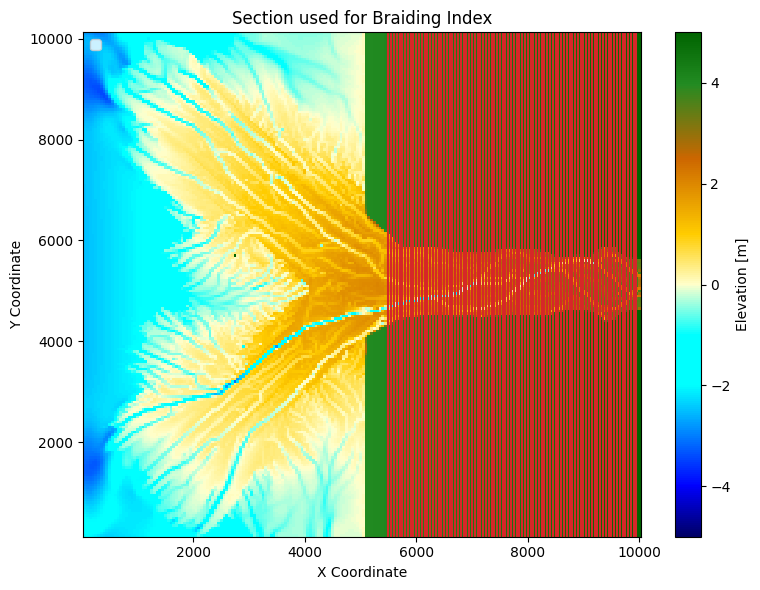

In [6]:
trim500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trim-001.nc"
trih500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trih-001.nc"

N_coords = range(110,200, 1)
nc_file = trim500
time_index=-1
vmin=-5
vmax=5
vcenter=0

left_cross = 0
middle_cross = 4   # Indexes for the rivers

# Load the NetCDF file
dataset = xr.open_dataset(nc_file)

# Extract coordinates and depth data
xc = dataset["XCOR"].values
yc = dataset["YCOR"].values
depth = dataset["DPS"]

# Trim the edges
xc_inner = xc[1:-1, 1:-1]
yc_inner = yc[1:-1, 1:-1]
depth_inner = depth[:, 1:-1, 1:-1] * -1  # Flip sign for elevation

# Time values
time_values = dataset["time"].values
depth_at_t = depth_inner[time_index, :, :]

# Define sharp sea-level-transition colormap
colors = [
    (0.00, "#000066"),   # deep water
    (0.10, "#0000ff"),   # blue
    (0.30, "#00ffff"),   # cyan
    (0.40, "#00ffff"),  # water edge
    (0.50, "#ffffcc"),  # land edge
    (0.60, "#ffcc00"),   # orange
    (0.75, "#cc6600"),   # brown
    (0.90, "#228B22"),   # green
    (1.00, "#006400"),   # dark green
]
terrain_like = LinearSegmentedColormap.from_list("custom_terrain", colors)
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Open Trih files
ds_his = xr.open_mfdataset(trih500, preprocess=dfmt.preprocess_hisnc, decode_timedelta=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(xc_inner, yc_inner, depth_at_t, shading='auto', cmap=terrain_like, norm=norm)
# for i in range(9):
    # ax.axvline(ds_his.XYTRA[i].values[0], color='r', linestyle='--', label=f'Cross-Section at {ds_his.XYTRA[i].values[0]}')
# N_coords = range(115, 190,1)
for i in N_coords:
    ax.axvline(i*50, color='C3')
# N_coords = range(109, 199,1 )

# ax.axvline(ds_his.XYTRA[left_cross].values[0], color='C1', linestyle='-', label=f'Cross-Section Left')
# ax.axvline(ds_his.XYTRA[middle_cross].values[0], color='b', linestyle='-', label=f'Cross-Section Middle')

ax.set_title(f'Section used for Braiding Index')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

cb = fig.colorbar(c, ax=ax, orientation='vertical', label='Elevation [m]')
plt.legend()
plt.tight_layout()
plt.show()

dataset.close()

In [7]:
# formula to count channels
def count_channels(line1, line2):
    crossings = 0
    for i in range(1, len(line1)):
        if (line1[i-1] > line2[i-1] and line1[i] < line2[i]) or (line1[i-1] < line2[i-1] and line1[i] > line2[i]):
            crossings += 1
    channels = crossings / 2 
    return channels

## Braiding Index at t50

In [9]:
N_coords = range(110,200, 1)
theta = 0.5                                                 # minimum TAU for river

BI_final = [] 

for trimfile in trimlist:
    # Load dataset
    dataset = nc.Dataset(trimfile, mode='r')
    x = dataset.variables["XCOR"][:]
    y = dataset.variables["YCOR"][:]
    xc_inner = x[1:-1, 1:-1]
    yc_inner = y[1:-1, 1:-1]
    df_stress = dataset.variables["TAUMAX"][46, 1:-1, 1:-1]
    # print(df_stress.shape)
    BI = []
    data = df_stress
    No_channels = 0
    for N in N_coords:
        z_cross = abs(data[N, :])
        x_cross = yc_inner[N, :]
        channels = count_channels(z_cross, [theta] * len(z_cross))
        No_channels += channels
        BI.append(channels)
    BI_final.append(BI)
# BI_final

In [10]:
# Transpose the data so rows = timesteps, columns = runIDs
df_lastmiddle = pd.DataFrame(BI_final).T
df_lastmiddle.columns = trimIDs
df_lastmiddle

,trimC,trim10,trim20,trim30,trim40,trim50,trim0_5,trim1_0,trim2_0,trim5_0,...,trimG2,trimG1,trimB1,trimB2,trimB3,trimB4,trimL1,trimL2,trimL3,trimL4
0,3.0,3.0,2.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,...,1.0,3.0,3.0,2.0,3.0,1.0,3.0,4.0,4.0,3.0
1,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,...,1.0,4.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,4.0
2,4.0,4.0,3.0,2.0,4.0,3.0,2.0,4.0,2.0,3.0,...,1.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0
3,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,4.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
4,3.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,...,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0
86,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,...,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0
87,3.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,...,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
88,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0


## Braiding Index at t100

In [12]:
# N_coords = range(115,190, 1)
theta = 0.5                                                 # minimum TAU for river

BI_final = [] 

for trimfile in trimlist:
    # Load dataset
    dataset = nc.Dataset(trimfile, mode='r')
    x = dataset.variables["XCOR"][:]
    y = dataset.variables["YCOR"][:]
    xc_inner = x[1:-1, 1:-1]
    yc_inner = y[1:-1, 1:-1]
    df_stress = dataset.variables["TAUMAX"][92, 1:-1, 1:-1]
    # print(df_stress.shape)
    BI = []
    data = df_stress
    No_channels = 0
    for N in N_coords:
        z_cross = abs(data[N, :])
        x_cross = yc_inner[N, :]
        channels = count_channels(z_cross, [theta] * len(z_cross))
        No_channels += channels
        BI.append(channels)
    BI_final.append(BI)
# BI_final

# Transpose the data so rows = timesteps, columns = runIDs
df_last100 = pd.DataFrame(BI_final).T
df_last100.columns = trimIDs
df_last100

,trimC,trim10,trim20,trim30,trim40,trim50,trim0_5,trim1_0,trim2_0,trim5_0,...,trimG2,trimG1,trimB1,trimB2,trimB3,trimB4,trimL1,trimL2,trimL3,trimL4
0,2.0,4.0,3.0,1.0,2.0,2.0,4.0,4.0,3.0,4.0,...,3.0,4.0,4.0,2.0,2.0,1.0,4.0,2.0,2.0,3.0
1,1.0,3.0,2.0,1.0,3.0,3.0,4.0,3.0,3.0,4.0,...,3.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0
2,1.0,4.0,1.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0,...,3.0,3.0,4.0,2.0,3.0,1.0,4.0,2.0,2.0,2.0
3,2.0,4.0,1.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0,...,4.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,2.0,2.0
4,1.0,2.0,1.0,1.0,3.0,2.0,3.0,2.0,3.0,5.0,...,4.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0
86,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0
87,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0
88,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0


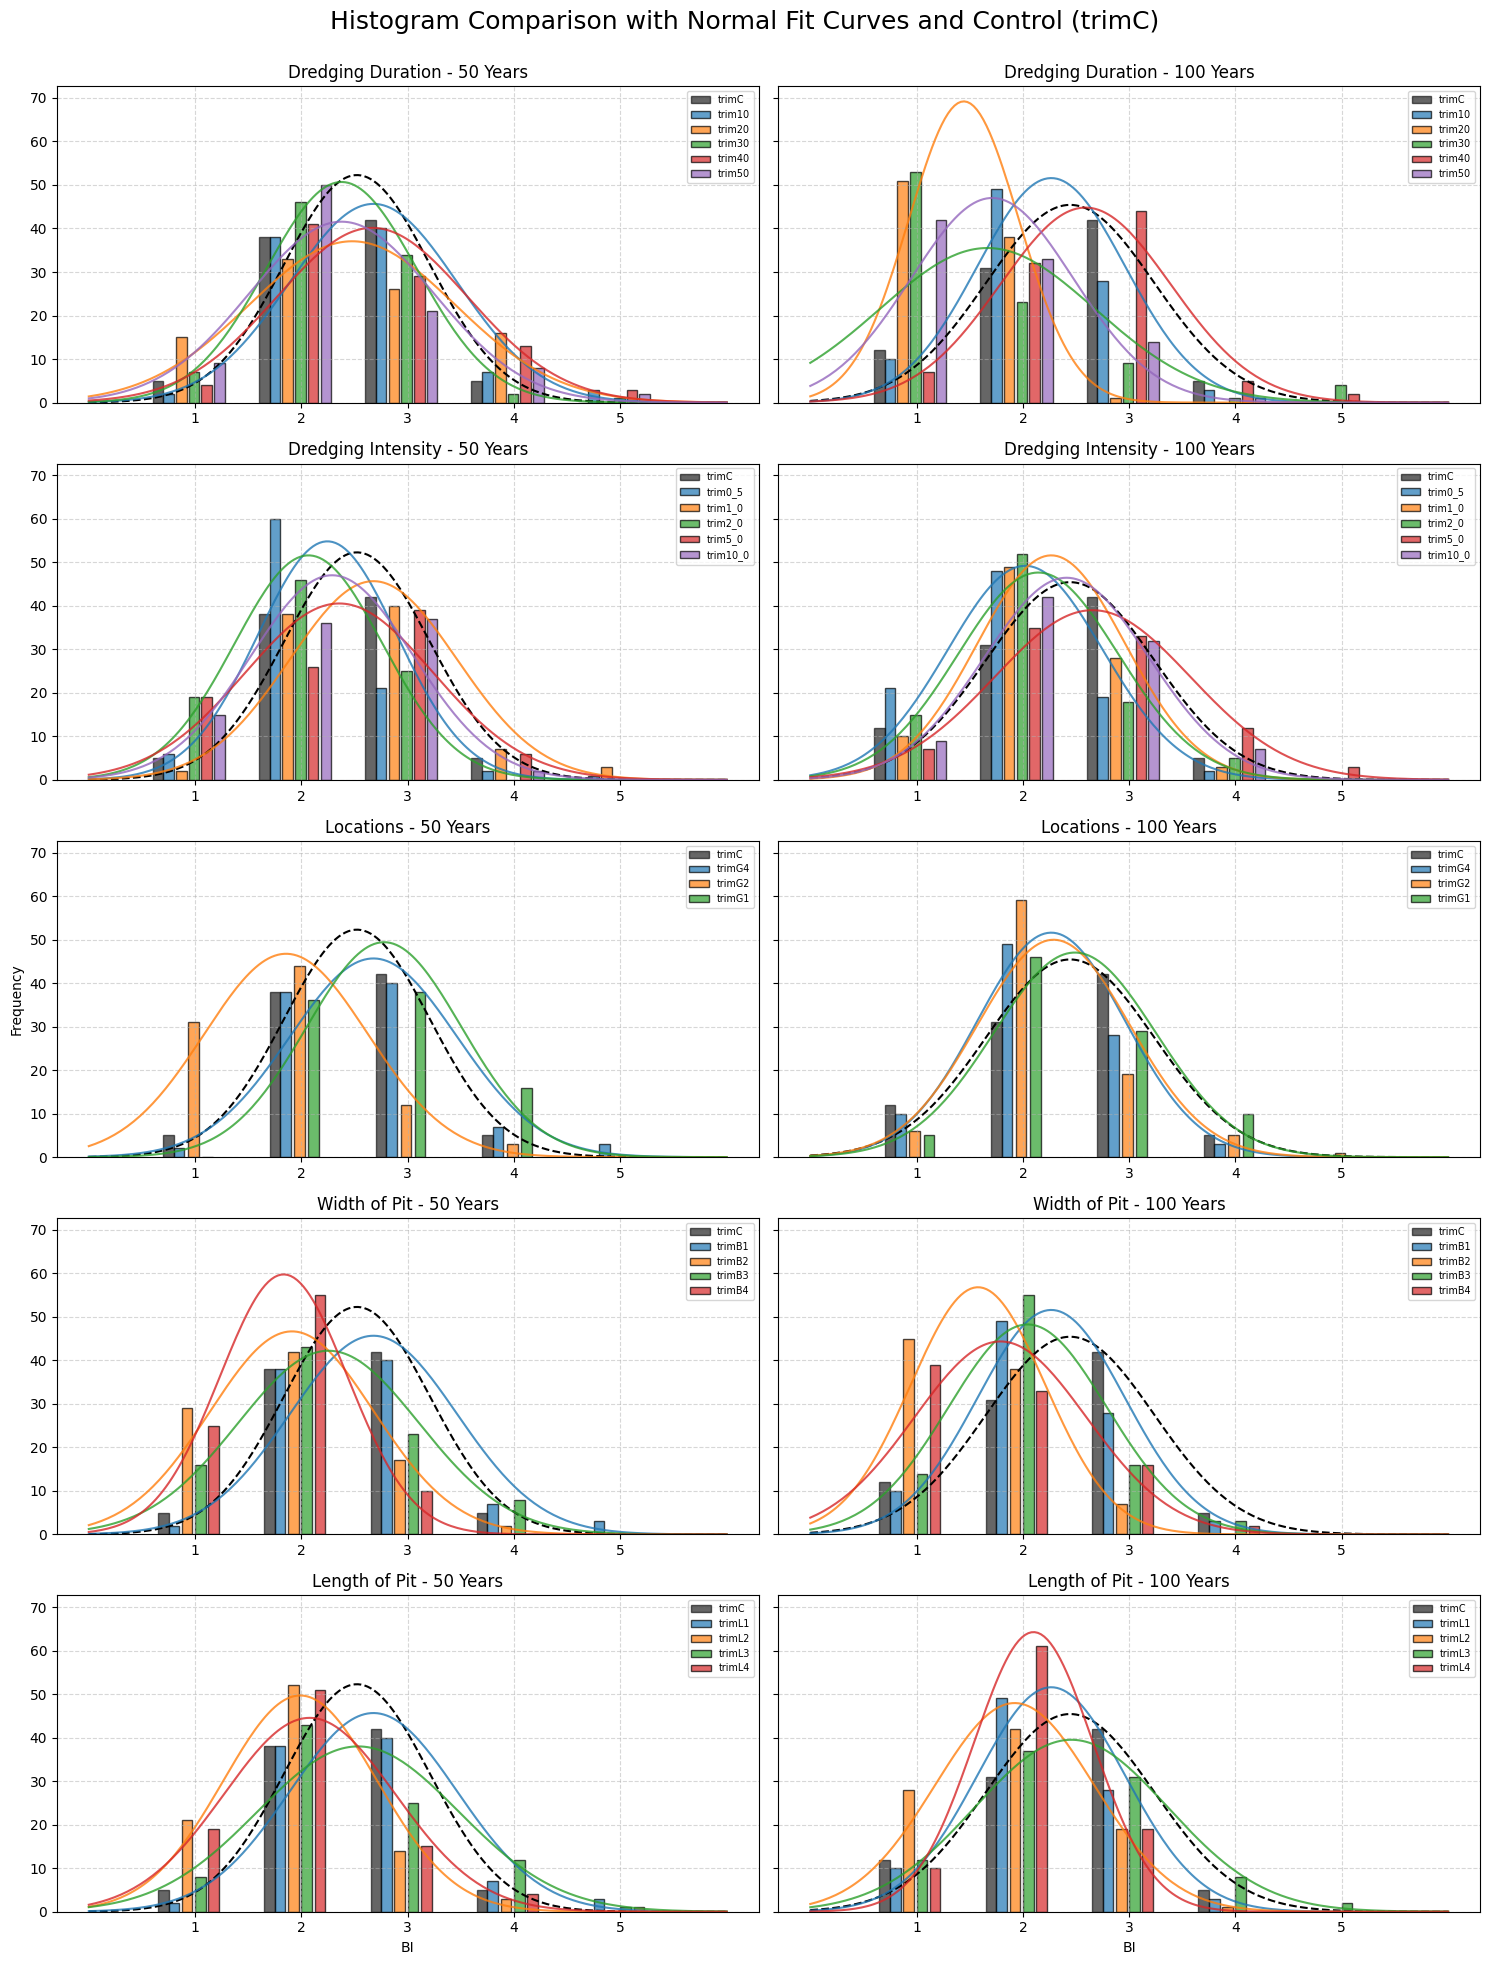

In [34]:
from scipy.stats import norm

groups = {
    'Dredging Duration': [col for col in df_lastmiddle.columns if "trim" in col and "_" not in col and not any(c in col for c in "GBL") and col != 'trimC'],
    'Dredging Intensity': [col for col in df_lastmiddle.columns if col in ['trim0_5', 'trim1_0', 'trim2_0', 'trim5_0', 'trim10_0']],
    'Locations': [col for col in df_lastmiddle.columns if "trimG" in col],
    'Width of Pit': [col for col in df_lastmiddle.columns if "trimB" in col],
    'Length of Pit': [col for col in df_lastmiddle.columns if "trimL" in col]
}

fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharey=True)
bins = np.arange(0.5, 6.5, 1)  # BI bins from 1 to 6
bin_centers = np.arange(1, 6)

bar_width = 0.1
colors = plt.cm.tab10.colors
control_color = 'black'

for row_idx, (group_name, columns) in enumerate(groups.items()):
    n_cols = len(columns)
    shifts = np.linspace(-bar_width * (n_cols + 1) / 2, bar_width * (n_cols + 1) / 2, n_cols, endpoint=False) + bar_width / 2

    # Left: 50 Years
    ax_left = axes[row_idx, 0]

    # Plot trimC first
    data_middle_ctrl = df_lastmiddle['trimC'].dropna()
    counts_ctrl, _ = np.histogram(data_middle_ctrl, bins=bins)
    ax_left.bar(bin_centers - bar_width * (n_cols / 2 + 1), counts_ctrl, width=bar_width, color=control_color, alpha=0.6, label='trimC', edgecolor='black')
    if len(data_middle_ctrl) > 1:
        mu, std = norm.fit(data_middle_ctrl)
        x = np.linspace(0, 6, 200)
        p = norm.pdf(x, mu, std) * len(data_middle_ctrl) * (bins[1] - bins[0])
        ax_left.plot(x, p, color=control_color, lw=1.5, linestyle='--')

    for i, col in enumerate(columns):
        data_middle = df_lastmiddle[col].dropna()
        counts, _ = np.histogram(data_middle, bins=bins)
        ax_left.bar(bin_centers + shifts[i], counts, width=bar_width, label=col, edgecolor='black', alpha=0.7, color=colors[i % len(colors)])
        if len(data_middle) > 1:
            mu, std = norm.fit(data_middle)
            x = np.linspace(0, 6, 200)
            p = norm.pdf(x, mu, std) * len(data_middle) * (bins[1] - bins[0])
            ax_left.plot(x, p, color=colors[i % len(colors)], lw=1.5, alpha=0.8)

    ax_left.set_title(f"{group_name} - 50 Years", fontsize=12)
    ax_left.set_xticks(bin_centers)
    ax_left.grid(True, linestyle='--', alpha=0.5)
    if row_idx == 4:
        ax_left.set_xlabel('BI')
    if row_idx == 2:
        ax_left.set_ylabel('Frequency')
    ax_left.legend(fontsize='x-small', loc='upper right')

    # Right: 100 Years
    ax_right = axes[row_idx, 1]

    data_100_ctrl = df_last100['trimC'].dropna()
    counts_ctrl_100, _ = np.histogram(data_100_ctrl, bins=bins)
    ax_right.bar(bin_centers - bar_width * (n_cols / 2 + 1), counts_ctrl_100, width=bar_width, color=control_color, alpha=0.6, label='trimC', edgecolor='black')
    if len(data_100_ctrl) > 1:
        mu, std = norm.fit(data_100_ctrl)
        x = np.linspace(0, 6, 200)
        p = norm.pdf(x, mu, std) * len(data_100_ctrl) * (bins[1] - bins[0])
        ax_right.plot(x, p, color=control_color, lw=1.5, linestyle='--')

    for i, col in enumerate(columns):
        data_100 = df_last100[col].dropna()
        counts, _ = np.histogram(data_100, bins=bins)
        ax_right.bar(bin_centers + shifts[i], counts, width=bar_width, label=col, edgecolor='black', alpha=0.7, color=colors[i % len(colors)])
        if len(data_100) > 1:
            mu, std = norm.fit(data_100)
            x = np.linspace(0, 6, 200)
            p = norm.pdf(x, mu, std) * len(data_100) * (bins[1] - bins[0])
            ax_right.plot(x, p, color=colors[i % len(colors)], lw=1.5, alpha=0.8)

    ax_right.set_title(f"{group_name} - 100 Years", fontsize=12)
    ax_right.set_xticks(bin_centers)
    ax_right.grid(True, linestyle='--', alpha=0.5)
    if row_idx == 4:
        ax_right.set_xlabel('BI')
    ax_right.legend(fontsize='x-small', loc='upper right')

plt.suptitle("Histogram Comparison with Normal Fit Curves and Control (trimC)", fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig('C:/Users/camup/Documents/aaMEE/Master thesis/figures/HistogramBIComparison.png', dpi=400)
plt.show()


## Kolmogorov–Smirnov test
The Kolmogorov–Smirnov test (also K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions. It can be used to test whether a sample came from a given reference probability distribution (one-sample K–S test), or to test whether two samples came from the same distribution (two-sample K–S test).

It results in a p-value, which can be used to accept or reject the null hypothesis (In this case, if the distributions could be drawn from the same group).\
And a KS-Statistic, which is the absolute difference between the control and the scenario. The smaller the number the closer they are to each other.


In [68]:
import pandas as pd
from scipy.stats import ks_2samp      # ks test for two samples

# Initialize storage
ks_results_50 = []
ks_results_100 = []

# Loop through groups
for group_name, columns in groups.items():
    for col in columns:
        # 50 years
        data_ctrl_50 = df_lastmiddle['trimC'].dropna()
        data_scenario_50 = df_lastmiddle[col].dropna()
        
        ks_stat_50, ks_pval_50 = ks_2samp(data_ctrl_50, data_scenario_50)

        ks_results_50.append([group_name, col, ks_stat_50, ks_pval_50])

        # 100 years
        data_ctrl_100 = df_last100['trimC'].dropna()
        data_scenario_100 = df_last100[col].dropna()
        
        ks_stat_100, ks_pval_100 = ks_2samp(data_ctrl_100, data_scenario_100)   # KS test
        
        ks_results_100.append([group_name, col, ks_stat_100, ks_pval_100])

# Convert to DataFrames
ks_df_50 = pd.DataFrame(ks_results_50, columns=['Group', 'Scenario', 'KS Statistic', 'p-value'])
ks_df_100 = pd.DataFrame(ks_results_100, columns=['Group', 'Scenario', 'KS Statistic', 'p-value'])

print("--- dataset 50 years ---")
print(ks_df_50)
print("--- dataset 100 years ---")
print(ks_df_100)


--- dataset 50 years ---
                 Group  Scenario  KS Statistic       p-value
0    Dredging Duration    trim10      0.055556  9.991956e-01
1    Dredging Duration    trim20      0.122222  5.145202e-01
2    Dredging Duration    trim30      0.111111  6.378269e-01
3    Dredging Duration    trim40      0.122222  5.145202e-01
4    Dredging Duration    trim50      0.177778  1.164097e-01
5   Dredging Intensity   trim0_5      0.255556  5.425197e-03
6   Dredging Intensity   trim1_0      0.055556  9.991956e-01
7   Dredging Intensity   trim2_0      0.244444  9.015400e-03
8   Dredging Intensity   trim5_0      0.155556  2.270430e-01
9   Dredging Intensity  trim10_0      0.111111  6.378269e-01
10           Locations    trimG4      0.055556  9.991956e-01
11           Locations    trimG2      0.355556  1.901914e-05
12           Locations    trimG1      0.122222  5.145202e-01
13        Width of Pit    trimB1      0.055556  9.991956e-01
14        Width of Pit    trimB2      0.311111  2.994605e-04